# Задача 2: аппроксимация функции

In [3]:
import math

In [6]:
def f(x):
    return math.sin(x / 5.) * math.exp(x / 10.) + 5. * math.exp(-x / 2.)

In [8]:
%matplotlib inline

In [9]:
from matplotlib import pylab as plt

In [12]:
import numpy as np

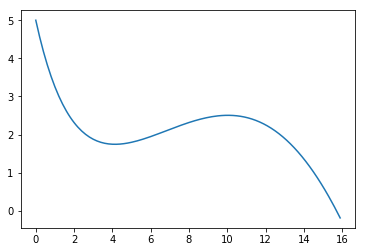

In [51]:
x_set = np.arange(0, 16, 0.1)
y_set = [f(x) for x in x_set]
plt.plot(x_set, y_set)
plt.show()

In [36]:
import scipy
from scipy import linalg

In [37]:
print f(1), f(15)

3.25221686527 0.635221419579


In [ ]:
w0 + w1 * x1 = f(x1)
w0 + w1 * x2 = f(x2)

In [38]:
A = np.array([[1, 1], [1, 15]])
A

array([[ 1,  1],
       [ 1, 15]])

In [39]:
b = np.array([[f(1)], [f(15)]])
b

array([[3.25221687],
       [0.63522142]])

In [41]:
w0, w1 = scipy.linalg.solve(A, b)

In [48]:
def f0(x):
    return w0 + w1 * x

In [81]:
functions = [f, f0]

In [74]:
def plot_functions(functions):
    x_set = np.arange(0, 16, 0.1)
    for f in functions:
        y_set = [f(x) for x in x_set]
        plt.plot(x_set, y_set)
    plt.show()

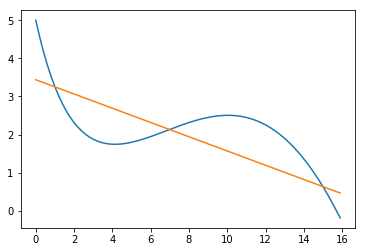

In [82]:
plot_functions(functions)

In [76]:
f_test = lambda x: x*x

In [158]:
def solve_linear(n, x_points, functions):
    A = []
    b = []
    for x_p in x_points:
        A.append([x_p ** x for x in range(n + 1)])
        b.append(f(x_p))
    A = np.vstack(A)
    b = np.vstack(b)
    w = scipy.linalg.solve(A, b)
    
    new_f = lambda x: sum((w[i] * x ** i for i, _ in enumerate(w)))
    functions.append(new_f)
    print 'A:', A
    print 'b:', b
    print 'w:', w
    plot_functions(functions)
    

In [165]:
len(functions)

5

In [170]:
functions.pop()

<function __main__.<lambda>>

A: [[ 1  1]
 [ 1 15]]
b: [[3.25221687]
 [0.63522142]]


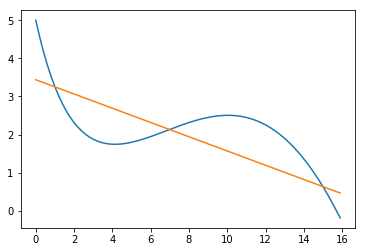

In [154]:
solve_linear(1, (1, 15), functions)

A: [[  1   1   1]
 [  1   8  64]
 [  1  15 225]]
b: [[3.25221687]
 [2.31617016]
 [0.63522142]]


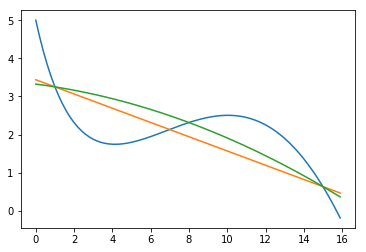

In [156]:
solve_linear(2, (1, 8, 15), functions)

A: [[   1    1    1    1]
 [   1    4   16   64]
 [   1   10  100 1000]
 [   1   15  225 3375]]
b: [[3.25221687]
 [1.74684595]
 [2.50541641]
 [0.63522142]]
w: [[ 4.36264154]
 [-1.29552587]
 [ 0.19333685]
 [-0.00823565]]


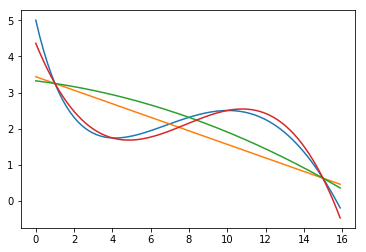

In [160]:
solve_linear(3, (1, 4, 10, 15), functions)

A: [[    1     1     1     1     1]
 [    1     2     4     8    16]
 [    1     3     9    27    81]
 [    1     4    16    64   256]
 [    1    16   256  4096 65536]]
b: [[ 3.25221687]
 [ 2.31503384]
 [ 1.87783842]
 [ 1.74684595]
 [-0.28745171]]
w: [[ 4.91701196e+00]
 [-2.11293592e+00]
 [ 4.93128207e-01]
 [-4.63973747e-02]
 [ 1.40999354e-03]]


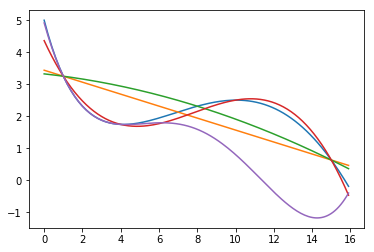

In [171]:
solve_linear(4, (1, 2, 3, 4, 16), functions)